In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

# DATA : Crime

## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [3]:
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A7 Clustering\\crime_data.csv",index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
for i in df.columns:
    print(i, '\n', df[i].value_counts(),'\n', '\n')

Murder 
 13.2    2
2.2     2
9.0     2
15.4    2
2.1     2
2.6     2
6.0     2
11.1    1
13.0    1
0.8     1
7.3     1
6.6     1
4.9     1
3.4     1
6.3     1
7.4     1
14.4    1
3.8     1
12.7    1
3.2     1
8.5     1
4.0     1
5.7     1
11.4    1
2.7     1
12.2    1
4.3     1
8.1     1
8.8     1
7.9     1
3.3     1
5.9     1
17.4    1
5.3     1
10.4    1
7.2     1
9.7     1
11.3    1
4.4     1
12.1    1
10.0    1
16.1    1
6.8     1
Name: Murder, dtype: int64 
 

Assault 
 120    3
249    2
159    2
109    2
174    1
57     1
285    1
254    1
337    1
45     1
151    1
106    1
236    1
102    1
279    1
86     1
188    1
201    1
48     1
156    1
145    1
81     1
53     1
252    1
259    1
178    1
263    1
294    1
190    1
276    1
204    1
110    1
238    1
335    1
211    1
46     1
113    1
56     1
115    1
83     1
300    1
149    1
255    1
72     1
161    1
Name: Assault, dtype: int64 
 

UrbanPop 
 66    4
80    4
70    2
44    2
48    2
72    2
60    2
83    2
67    2


In [6]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Murder: [13.2 10.   8.1  8.8  9.   7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2
  2.2  6.   9.7  2.1 11.3  4.4 12.1  2.7 16.1  4.3 12.2  7.4 11.4 11.1
 13.   0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 12.7  3.2  8.5  4.   5.7
  6.8]
Assault: [236 263 294 190 276 204 110 238 335 211  46 120 249 113  56 115 109  83
 300 149 255  72 259 178 102 252  57 159 285 254 337  45 151 106 174 279
  86 188 201  48 156 145  81  53 161]
UrbanPop: [58 48 80 50 91 78 77 72 60 83 54 65 57 66 52 51 67 85 74 44 70 53 62 81
 56 89 86 45 75 68 87 59 32 63 73 39]
Rape: [21.2 44.5 31.  19.5 40.6 38.7 11.1 15.8 31.9 25.8 20.2 14.2 24.  21.
 11.3 18.  16.3 22.2  7.8 27.8 35.1 14.9 17.1 28.2 16.4 16.5 46.   9.5
 18.8 32.1 26.1 16.1  7.3 21.4 20.  29.3  8.3 22.5 12.8 26.9 25.5 22.9
 11.2 20.7 26.2  9.3 10.8 15.6]


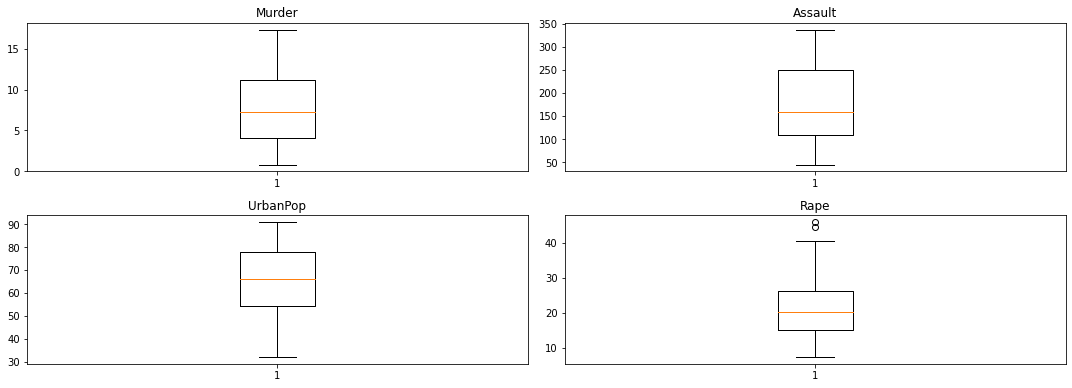

In [10]:
plt.figure(figsize=(15,40))
for i,j in enumerate(df.columns):
  plt.subplot(15,2,i+1)
  plt.boxplot(df[j])
  plt.title(j)
  plt.tight_layout()

In [12]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [14]:
df[df.duplicated()].count()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

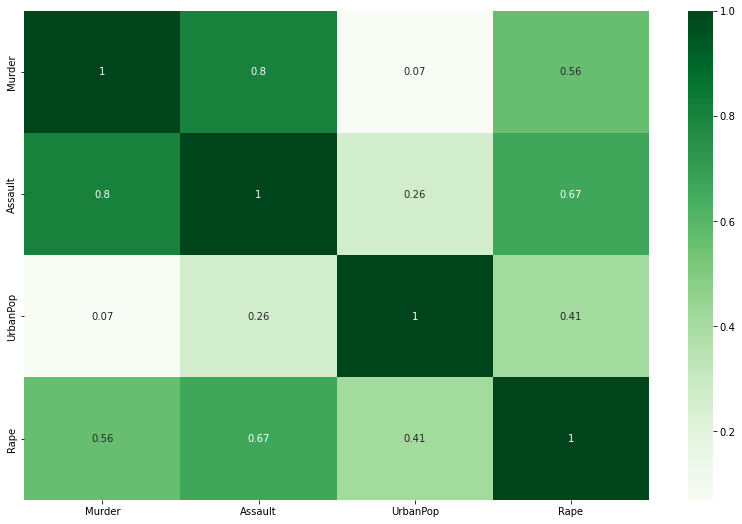

In [28]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Greens')
plt.show()

# Hierarchical Clustering with agglomerative Method :

>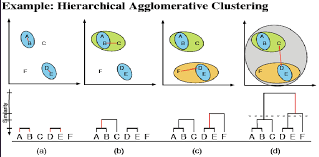

In [29]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [30]:
data = df.copy()

In [31]:
d = preprocessing.normalize(data)
data_norm = pd.DataFrame(d ,columns=data.columns)
data_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [32]:
data_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.040677,0.881704,0.409630,0.119341
std,0.015018,0.101645,0.166944,0.035642
min,0.012626,0.473419,0.132112,0.042620
25%,0.027485,0.850453,0.279234,0.092741
50%,0.039406,0.907323,0.395010,0.117441
75%,0.049811,0.952031,0.508929,0.139552
max,0.079346,0.989371,0.854213,0.207893


## Methods :

>  Method 1 : Single-linkage (The closest point in each cluster)

>  Method 2 : Centroid (The average of each cluster)

>  Method 3 : Complete-linkage (The furthest point in each cluster)

>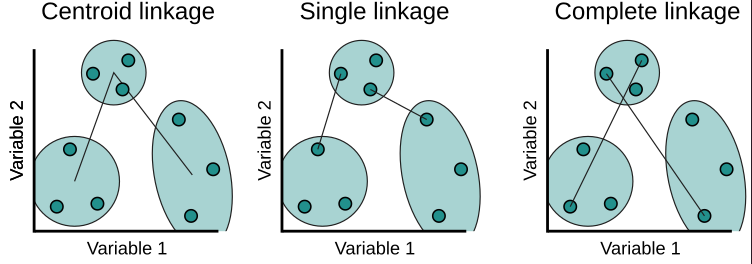

## Method 1 : Single-linkage (The closest point in each cluster)

> In single-link (or single linkage) hierarchical clustering, we merge in each step the two clusters whose two closest members have the smallest distance (or: the two clusters with the smallest minimum pairwise distance)

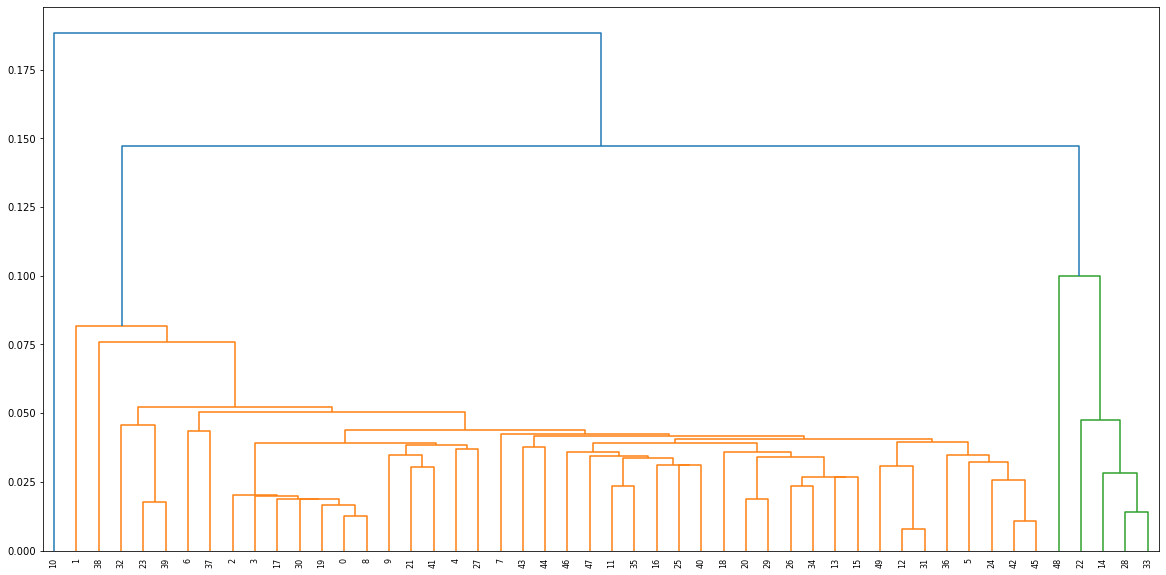

In [35]:
plt.figure(figsize=(20,10))
dendrogram1 = sch.dendrogram(sch.linkage(data_norm, method='single'))

* Seeing at the dendogram we can select number of clusters as 4

In [39]:
hc1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "complete")
hc1.fit(data_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [41]:
#saving the clusters 
y_hc1 = hc1.fit_predict(data_norm)
y_hc1

array([2, 2, 2, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3, 0, 3, 1, 2, 3, 2, 3, 1,
       0, 2, 1, 1, 3, 1, 0, 3, 2, 1, 2, 0, 3, 1, 1, 3, 3, 2, 1, 1, 1, 3,
       3, 1, 1, 1, 0, 1], dtype=int64)

In [44]:
#adding the clusters to the dataframe
data['clusterID_hc'] = y_hc1
data.head()

,Murder,Assault,UrbanPop,Rape,clusterID_hc
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [47]:
#number of datapoints for each clusters
data['clusterID_hc'].value_counts()

1    21
3    12
2    11
0     6
Name: clusterID_hc, dtype: int64

In [48]:
data['clusterID_hc'].var()

0.9832653061224487

In [46]:
df1_clustered1 = data.sort_values("clusterID_hc")
df1_clustered1.iloc[:,[-1]]

,clusterID_hc
North Dakota,0
Wisconsin,0
Iowa,0
New Hampshire,0
Hawaii,0
Minnesota,0
Montana,1
Nevada,1
New York,1
Missouri,1


## Method 2 : Centroid (The average of each cluster)

> In the centroid method, the distance between two clusters is defined as the Euclidean distance between their centroid or means. The distance between two cluster is the ANOVA sum of squares between the clusters added up over all the variables.

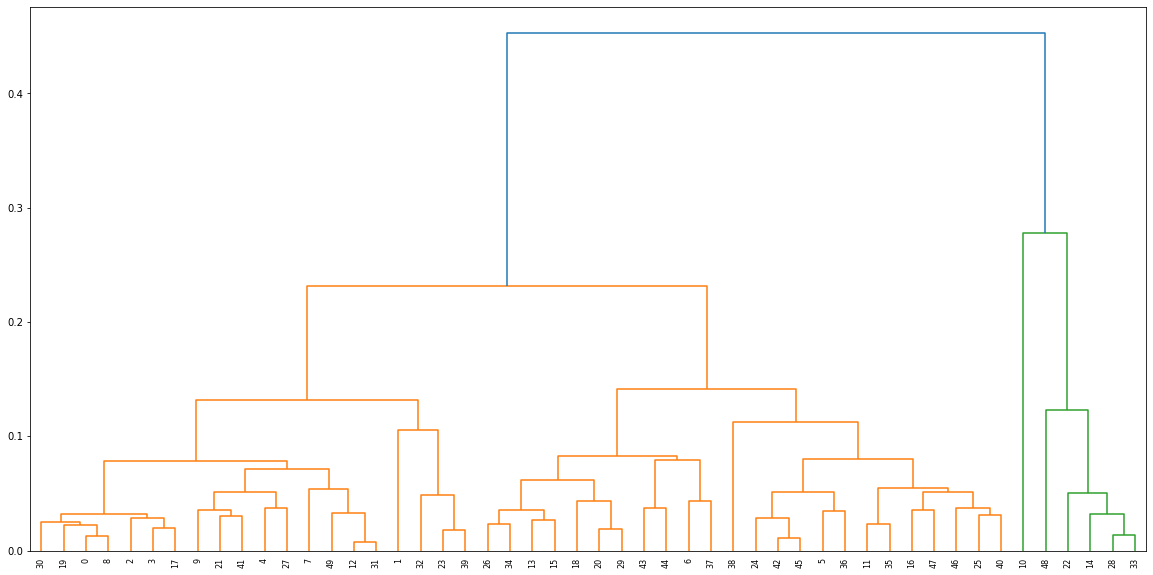

In [49]:
plt.figure(figsize=(20,10))
dendrogram2 = sch.dendrogram(sch.linkage(data_norm, method='average'))

 * Seeing at the dendogram we can select number of clusters as 4.

In [51]:
#create cluster
hc2 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "average")
hc2.fit(data_norm)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [52]:
#saving the clusters
y_hc2 = hc2.fit_predict(data_norm)
y_hc2

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 3, 1], dtype=int64)

In [53]:
#adding the clusters to the dataframe
data['clusterID_hc'] = y_hc2
data.head()

,Murder,Assault,UrbanPop,Rape,clusterID_hc
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,1


In [54]:
#number of datapoints for each clusters
data["clusterID_hc"].value_counts()

0    24
1    20
3     5
2     1
Name: clusterID_hc, dtype: int64

In [55]:
data["clusterID_hc"].var() 

0.8493877551020408

In [56]:
df2_clustered1 = data.sort_values("clusterID_hc")
df2_clustered1.iloc[:,[-1]]

,clusterID_hc
Missouri,0
Nebraska,0
Montana,0
Ohio,0
Oklahoma,0
Massachusetts,0
Oregon,0
Maine,0
Pennsylvania,0
Kentucky,0


## Method 3 : Complete-linkage (The furthest point in each cluster)

> The complete linkage method is a hierarchical classification method where the distance between two classes is defined as the greatest distance that could be obtained if we select one element from each class and measure the distance between these elements.

In [57]:
data2 = df.copy()

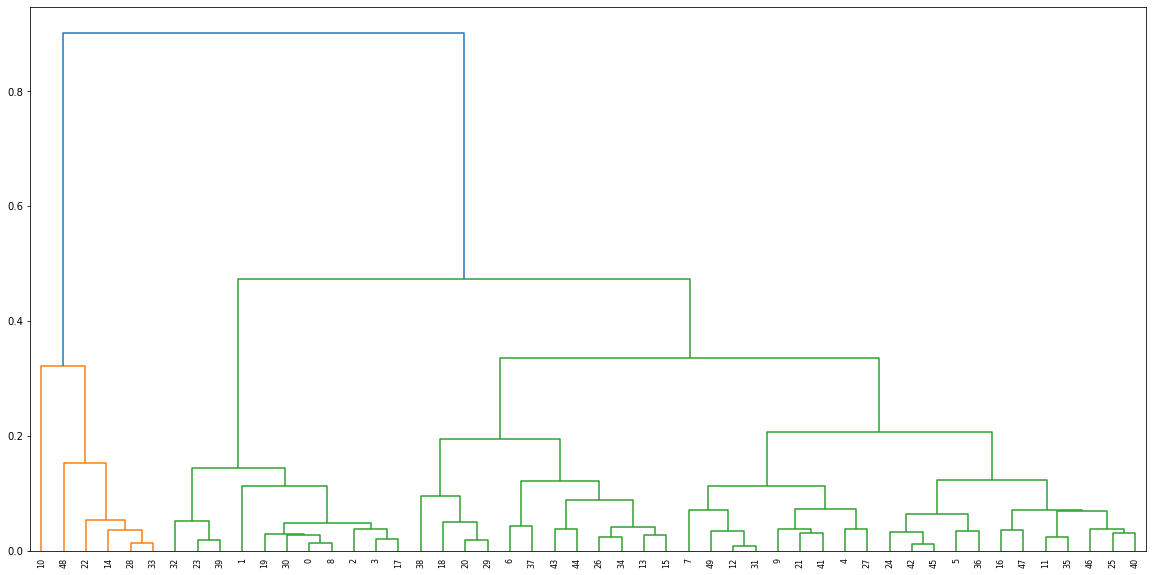

In [58]:
plt.figure(figsize=(20,10))
dendrogram3 = sch.dendrogram(sch.linkage(data_norm, method='complete'))

 * Seeing at the dendogram we can select number of clusters as 3

In [59]:
#create cluster
hc3 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
hc3.fit(data_norm)
hc3.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [60]:
#saving the clusters
y_hc3 = hc3.fit_predict(data_norm)
print(y_hc2)

[1 1 1 1 1 0 0 1 1 1 2 0 1 0 3 0 0 1 0 1 0 1 3 1 0 0 0 1 3 0 1 1 1 3 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 3 1]


In [61]:
#adding the clusters to the dataframe
data2['clusterID_hc'] = y_hc3
data2

,Murder,Assault,UrbanPop,Rape,clusterID_hc
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,0


In [62]:
data2['clusterID_hc'].var()

0.7004081632653061

> Variation is low as compare to Method 2 .

In [63]:
#number of datapoints for each clusters
data2["clusterID_hc"].value_counts()

0    33
2    11
1     6
Name: clusterID_hc, dtype: int64

In [28]:
df_clustered1 = data2.sort_values("clusterID_hc").iloc[:,[-1]]
df_clustered1

,clusterID_hc
ID,
1748,0
614,0
2083,0
103,0
1429,0
...,...
3720,5
3724,5
3770,5


# K-Means Clustering :

>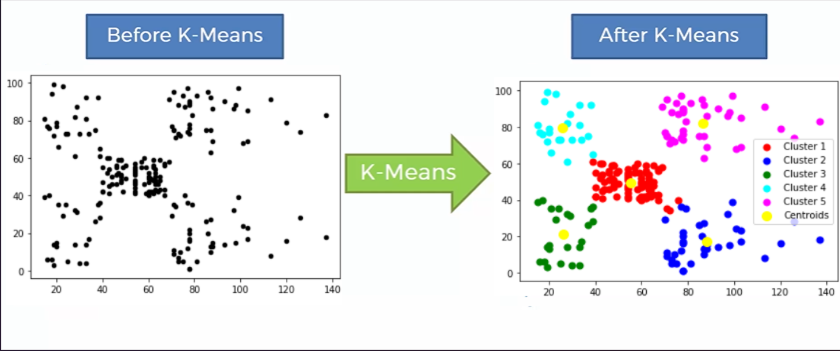

In [64]:
data_km = df.copy()
data_km

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [65]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_km = scaler.fit_transform(data_km.iloc[:,1:])
scaled_data_km

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

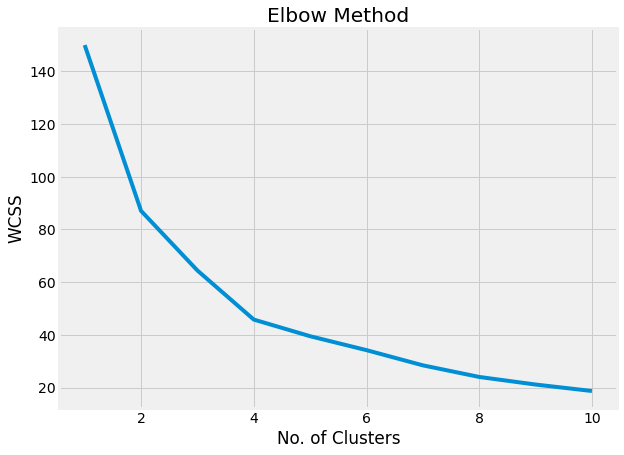

In [66]:
plt.figure(figsize=(10,7))
wcss2 = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_data_km)
  wcss2.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),wcss2)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

>Looking at the curve we may conclude that the number of clusters shall be taken as 4.

## Checking Elbow point :

In [67]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [68]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss2, curve="convex", direction="decreasing")
kl.elbow

4

In [69]:
#Build Cluster algorithm
clusters_new = KMeans(n_clusters=4,random_state=42)
clusters_new.fit(scaled_data_km)

KMeans(n_clusters=4, random_state=42)

In [70]:
clusters_new.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 1, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 1, 3, 3, 1])

In [72]:
#assign clusters to the dataset
data_km["clusterID_km"] = clusters_new.labels_
data_km.head()

,Murder,Assault,UrbanPop,Rape,clusterID_km
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [73]:
#number of datapoints for each clusters
data_km["clusterID_km"].value_counts()

1    20
2    11
3    11
0     8
Name: clusterID_km, dtype: int64

In [74]:
data_km["clusterID_km"].var()

1.030612244897959

In [75]:
df_clustered2 = data_km.sort_values("clusterID_km")
df_clustered2.iloc[:,[-1]]

,clusterID_km
Alabama,0
Louisiana,0
North Carolina,0
Mississippi,0
South Carolina,0
Tennessee,0
Georgia,0
Arkansas,0
Utah,1
Rhode Island,1


In [76]:
# ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)

# DBSCAN

>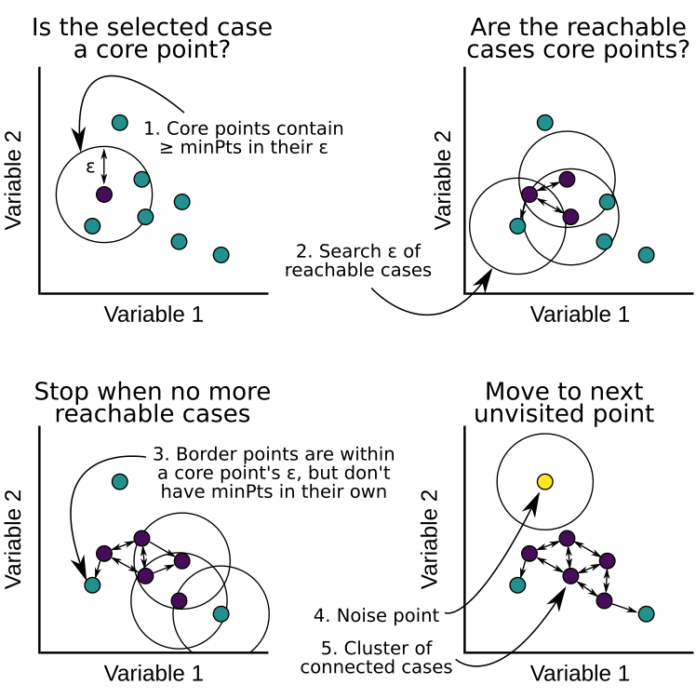

In [77]:
#creating a copy
data_db = df.copy()

In [78]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_db = scaler.fit_transform(data_db.iloc[:,1:])
scaled_data_db

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

### Finding the Optimal value of Epsilon

>Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.


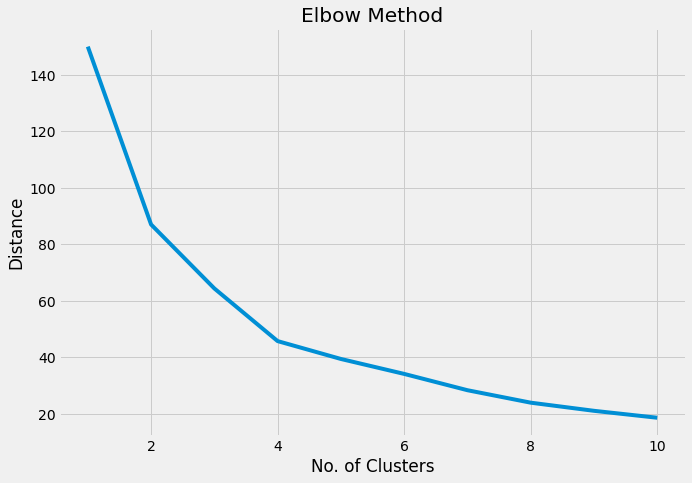

In [79]:
plt.figure(figsize=(10,7))
distance = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_data_db)
  distance.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),wcss2)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Distance")
plt.show()

In [80]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss2, curve="convex", direction="decreasing")
kl.elbow

4

In [82]:
#creating clusters
dbscan = DBSCAN(eps=4, min_samples=11)
dbscan.fit(scaled_data_db)

DBSCAN(eps=4, min_samples=11)

In [83]:
#assigning the clusters to the datset
data_db["clusterID_db"] = dbscan.labels_
data_db.head()

,Murder,Assault,UrbanPop,Rape,clusterID_db
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0


In [84]:
data_db["clusterID_db"].var()

0.0

In [85]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

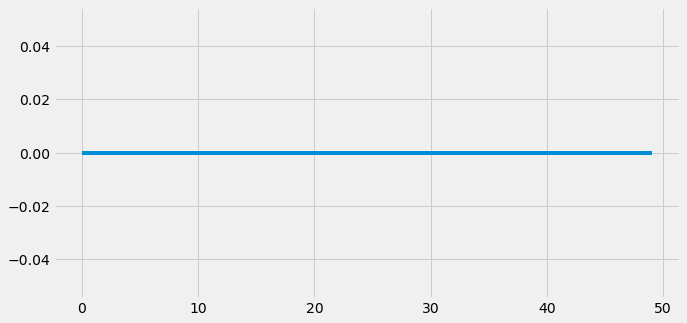

In [90]:
plt.figure(figsize=(10,5))
plt.plot(dbscan.labels_)
plt.show()

In [91]:
data_db["clusterID_db"].value_counts()

0    50
Name: clusterID_db, dtype: int64

In [92]:
#creating dataframe for plot
counts = pd.DataFrame({"Cluster_No" : [-1,0,1,2], "clusterID_db" : [23,3934,15,23]})
counts

,Cluster_No,clusterID_db
0,-1,23
1,0,3934
2,1,15
3,2,23


<BarContainer object of 4 artists>

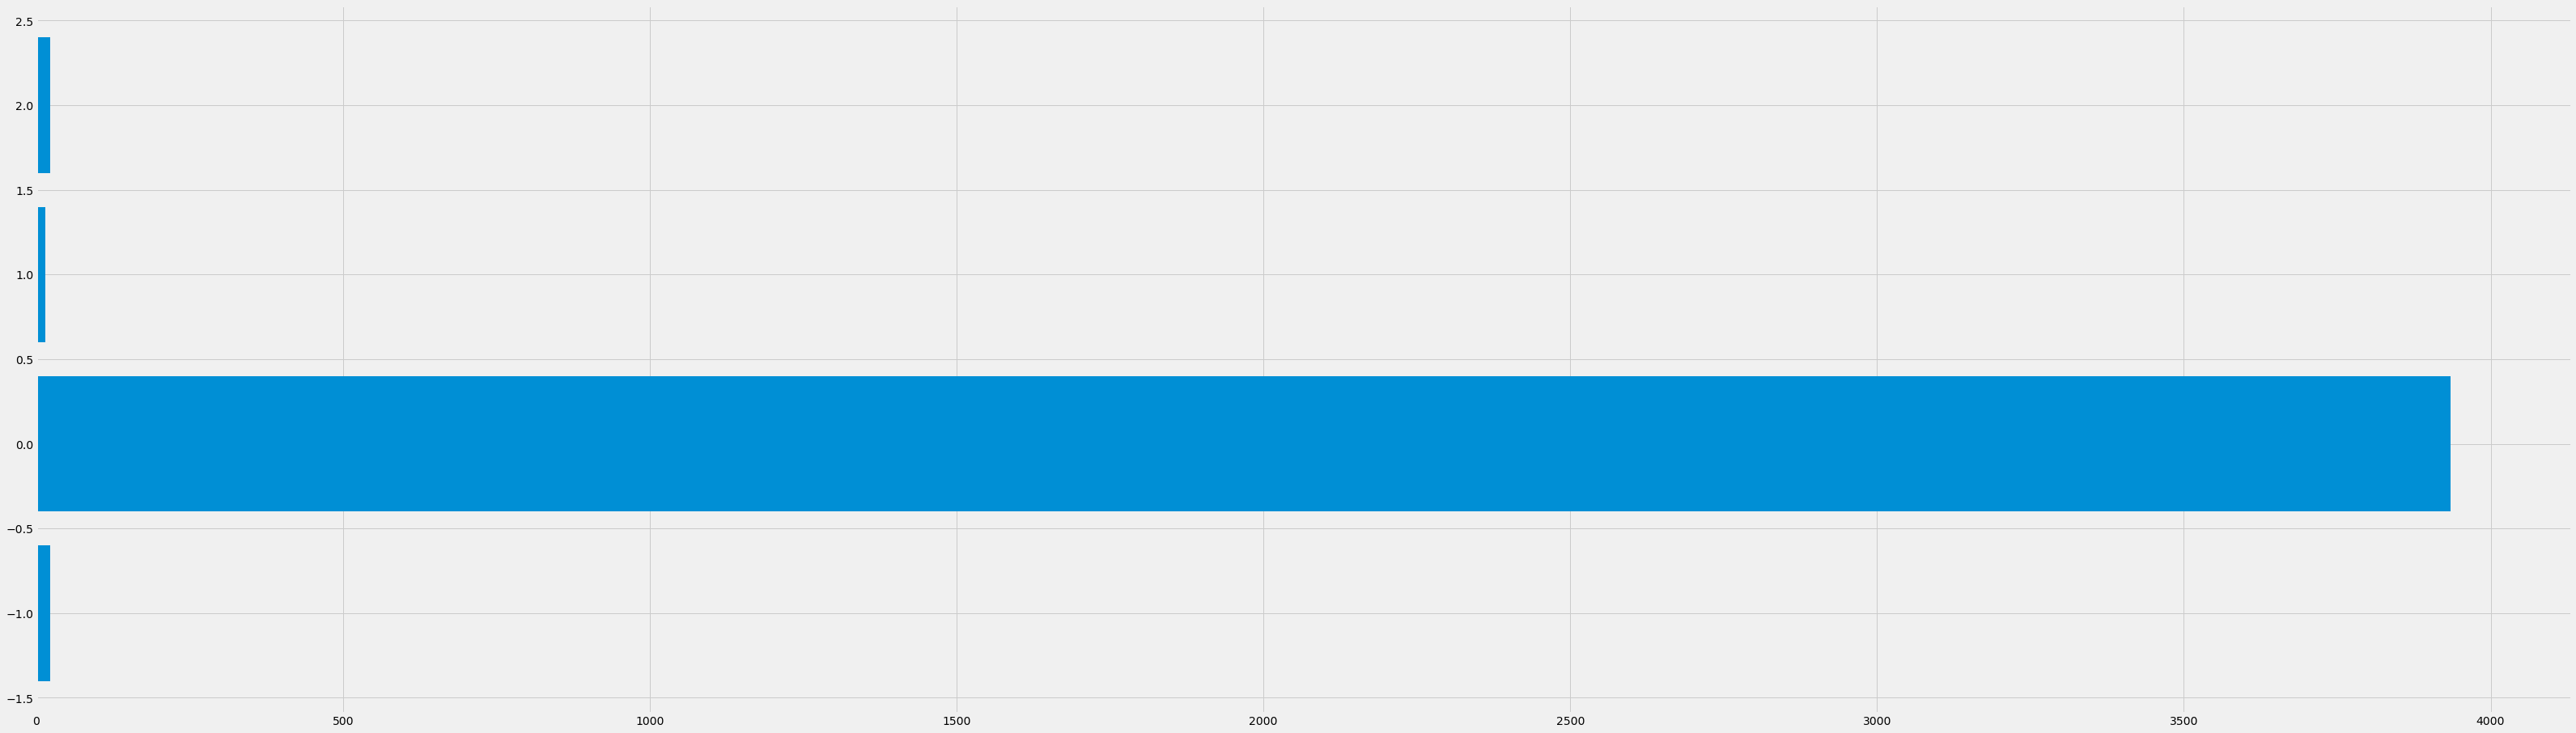

In [93]:
plt.figure(figsize=(50,15))
plt.barh(counts["Cluster_No"], counts["clusterID_db"])

In [94]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 1


In [95]:
# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of noise points: 0


> The DBSCAN has created 3 clusters, and the cluster with -1 label represents the noisy datapoints.

In [96]:
df_clustered3 = data_db.sort_values("clusterID_db")
df_clustered3.iloc[:,[-1]]

,clusterID_db
Alabama,0
Nevada,0
New Hampshire,0
New Jersey,0
New Mexico,0
New York,0
North Carolina,0
North Dakota,0
Ohio,0
Oklahoma,0


In [97]:
#comparing the clusters from various methods
hc = data["clusterID_hc"]
kmeans = data_km["clusterID_km"]
dbscan = data_db["clusterID_db"]
final = pd.concat([hc, kmeans, dbscan], axis=1)
final

,clusterID_hc,clusterID_km,clusterID_db
Alabama,1,0,0
Alaska,1,2,0
Arizona,1,2,0
Arkansas,1,0,0
California,1,2,0
Colorado,0,2,0
Connecticut,0,1,0
Delaware,1,1,0
Florida,1,2,0
Georgia,1,0,0


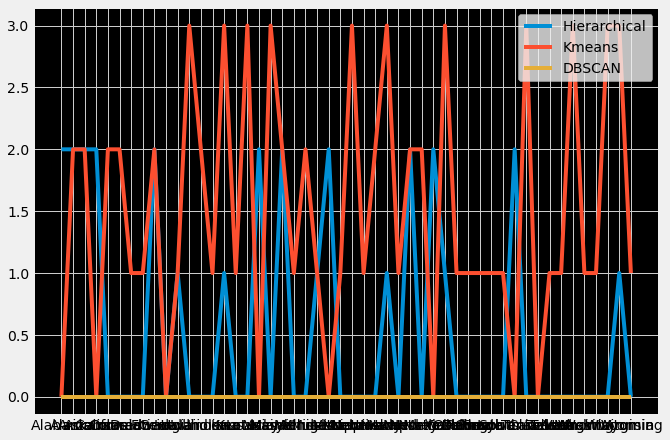

In [99]:
plt.figure(figsize=(10,7) )
plt.axes(facecolor='black')
plt.plot(data2['clusterID_hc'],label = "Hierarchical")
plt.plot(data_km["clusterID_km"],label = "Kmeans")
plt.plot(data_db["clusterID_db"],label = "DBSCAN")
plt.legend(loc='upper right')
plt.show()